# User Guide

## Overview

This program was created in order to simulate brine shrimp population. This includes simulating movement, interactions between shrimp, creation of new shrimp and death of aging shrimp. This is accomplished using a file with class definitions and a file containing driver code to run the simulation. The driver code loops to keep updating the shrimp until end conditions are met. 

## Required Features
### Life Cycle
The program implements the life cycle of a shrimp in several stages. The stages are as follows in sequential order: egg, hatchling, juvenile, adult and couple. Each shrimp is an instance of a shrimp class which provides functionality for age, movement and collisions. 
Aggregation is used to have a stage class field which holds an object corresponding to the shrimp's stage in life. each of these stage classes hold information about the movement speed, and image to display. This allows easy transition between stages by simply initialising an instance of a the new stage.
### Visualisation
Each stage in the life cycle has a unique image to display, with two images for adult, one for male and female. These images were created using an online editor for pixel art (piskel, n.d.). The image for the egg stage was imported from online (clipart, 2019) and modified. These images were implemented in each stage class using the pygame module's built-in methods.
### Movement
The shrimp can move in any eight directions, moving in a straight line ore diagonal. The total distance traveled will be the same regardless of direction. The distance to move is defined in the stage class. Movement is called from the driver code, passing the screen limits so that the movement function can ensure shrimps stay within the screen. When updating the shrimp, there is a chance the shrimp can change direction. This means the shrimp will continue in a straight line until colliding with a wall or other shrimp, or a change of direction event occurs. This reflects the nature of the brine shrimp who are likely to move in a single direction until they have reason to change direction than to continuously change direction.
### Collisions
The collisions are implemented inside the driver code by looping through a list of the shrimps currently in existence. The shrimps movement is then updated. A collision list is created which contains all the shrimp except the one being updated. The shrimp is then compared to the shrimp in this list using a pygame collision method. This method check if the rectangular coordinates of the shrimps intersect and returns a list with all those that intersected. This list of shrimp involved in collisions is then iterated over to resolve each collision. If the shrimp colliding are both eggs, the eggs are destroyed, if male and female adults, one is removed and the other updated to be a couple, i.e. shrimp join together. If it is just a general collision, the collide method in the class file is called. This method moves the offending shrimp so that it is next to the other shrimp rather than intersecting with it. The direction of the shrimp is then reversed.
A demonstration of the program shown below to demonstrate collisions:




In [1]:
##NOTE: Will require instllation of pygame - can be installed with:  pip install pygame
#May need to be run twice on subsequent trials
#click to add eggs.
#press alt + f4 to exit simulation and produce graph
%run 'simBaseCol.py'

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
not enough arguments provided. Using defaults


### Reproduction
Once male and female shrimp collide to form a couple they have a 1 in 10 chance to reproduce and create a new egg. This reflects the protective nature of the male shrimp, who will guard the female from mating with other males, since as a couple no other shrimp can collide to reproduce.
### System Arguments
Both the class file and the driver code required system arguments. Since the driver code was already implementing the class file, they system arguments  needed to be stored in another file. Both files import this file to access these arguments. The arguments taken are: Number of shrimp, x screen dimension, y screen dimension, death multiplier and time to change stages. 


## Additional Features
### Interactivity 
The program supports interactivity by allowing the user to add additional eggs by clicking the mouse. This is implemented by using a pygame mouse click event. this event will then be added to the event queue which gets checked every iteration. When this event is present, a new egg is created at the location of the mouse.
### Parameter Sweep
The program implements two parameter sweeps. The first one, sweeps through different values for the death multiplier, number of shrimp, and screen dimensions. A separate sweep is set up to iterate different values for the time to change stage. These are implemented in a bash scripts. These bash scripts loop through the appropriate variables and run the program with these variables as system arguments.
### Plotting 
Upon completion or exiting of the program, a graph is produced which shows the variation in number of shrimp over the course of the program. This plot has name corresponding to the variables used in the format shrimp_NUMSHRIMP_MULTIPLIER_XDIM_YDIM.png.
### Variable execution speed
The speed at which the program runs can be updated to a certain number of frames per second(fps). This is done by using a clock and setting the clock tick to a certain fps every iteration. While this value can be adjusted, it will be limited by the ability of the computer running the program and the program computational speed. This means that a fps of 10000 will likely not result in a speed of 10000 frames per second but will only execute as fast as the environment will allow it to.
### Chance of death
Each shrimp has an age variable. For each iteration of the program, the age increments. Each time the age is incremented there is a chance the shrimp might die. This chance is calculated using a cubic function to allow higher chance of death for eggs and increasing chance for increasing age. It is normalized for time to change stage so chance of death is the same at the end period of each stage. The chance is also multiplied by a multiplier to allow system arguments to vary chance of death. 

## Instructions on Use
The program uses the following packages, make sure they are installed before you run the program. Most of these will probably already be installed.
* pygame
* math
* random
* matplotlib
* sys
* time


To run the program type the following command

```python3 simBase.py  NUMSHRIMP XDIM YDIM MULTIPLIER TIME2CHANGE```

This will run the program using the values passed as system arguments. If an  insufficient number of arguments are passed, then default values will be used.
The program will end when the end conditions are met. If you wish the program to continue indefinitely, in order to allow greater interactivity, use ``` simBaseUser.py ``` instead of ```simBase.py```
```simBaseSweep.py``` and ```simBaseTime.py``` are only for the parameter sweeps and have suppressed output.
To run the parameter sweep execute the following code. Note that these sweeps can take a long period of time to compute.
```bash paramSweep.sh``` Results will be in paramSweeps folder
```bash timeSweep.sh``` Results will be in timeSweepResults folder

see below for demonstration:




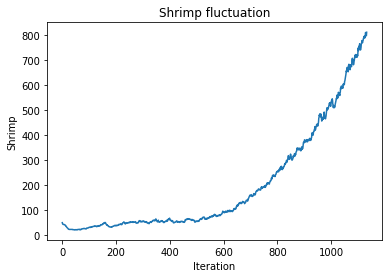

In [2]:
#may need to run twice on subsequent trials
#click to add eggs.
#press alt + f4 to exit and produce graph
numShrimp = 50
XDIM = 1400
YDIM = 900
multiplier = 1.3
time2change = 10
%run -i simBaseUser.py numShrimp XDIM YDIM multiplier time2change

## References
    2019. "Cute Cartoon Eggs Clipart."Clipart.http://clipart-library.com/clipart/814199.htm

    n.d. "Piskel-free online editor for animated sprites & pixel art."Piskel.https://www.piskelapp.com/
    
    Inspiration for parameter sweeps:
    den Boer, Stephen. 2019. "Prac08."Curtin Uiversity.https://lms.curtin.edu.au/webapps/assignment/uploadAssignment?content_id=_7100676_1&course_id=_89181_1&group_id=&mode=view
    
    Inspiration for pygame implementations:
    Fincehr, John. 2019."PyGame: A Primer on Game Programming in Python."RealPython.https://realpython.com/pygame-a-primer/
    